In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the training data

In [50]:
training_data_path = 'data.csv'
training_data = pd.read_csv(training_data_path)

# Preprocess the training data

In [51]:
X_train_data = training_data.drop(['AnimalID', 'ID', 'Name', 'Intake-DateTime', 'Outcome-DateTime', 'Date-Of-Birth', 'IsAdopted'], axis=1)
y_train_data = training_data['IsAdopted'].astype(int)
X_train_encoded = pd.get_dummies(X_train_data)

In [65]:
# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y_train_data, test_size=0.2, random_state=42)

In [53]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model

In [55]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
y_pred = dt_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy on test set: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8742
           1       1.00      1.00      1.00      8418

    accuracy                           1.00     17160
   macro avg       1.00      1.00      1.00     17160
weighted avg       1.00      1.00      1.00     17160



# Load the implementation data

In [56]:
# Load the implementation data
implementation_data_path = 'petfinder.csv'
implementation_data = pd.read_csv(implementation_data_path)

In [57]:
# Preprocess the implementation data similarly to the training data
X_implementation_data = implementation_data.drop(['Petfinder-ID', 'Name'], axis=1)
X_implementation_encoded = pd.get_dummies(X_implementation_data)
X_implementation_encoded = X_implementation_encoded.reindex(columns = X_train_encoded.columns, fill_value=0)

In [58]:
# Scaling the implementation data
X_implementation_scaled = scaler.transform(X_implementation_encoded)

In [59]:
# Predict on the implementation data
implementation_predictions = dt_classifier.predict(X_implementation_scaled)

In [60]:
# Add predictions to the implementation dataframe
implementation_data['Predicted_IsAdopted'] = implementation_predictions

In [61]:
print(implementation_data.head())

   Petfinder-ID     Name         Size  Gender     Age     Color  \
0      65653819   Eloise        Large  Female   Adult      Gray   
1      68926034    Penny       Medium  Female    Baby     Black   
2      69313950  Pirate   Extra Large    Male    Baby  Tricolor   
3      69340682    Fiona        Small  Female  Senior   Apricot   
4      69402276     Rory       Medium  Female   Adult       Red   

                  Breed  Category  Intelligence-Ranking Intelligence-Category  \
0          Bull Terrier   Terrier                    66                  Fair   
1    Labrador Retriever  Sporting                     7             Brightest   
2         Saint Bernard   Working                    65                  Fair   
3             Chihuahua       Toy                    67                  Fair   
4  Pembroke Welsh Corgi   Herding                    11             Excellent   

  Size-Category  Longevity  Total-Cost($)  Purchase-Cost($)  Food-Cost($)  \
0        Medium      10.21       

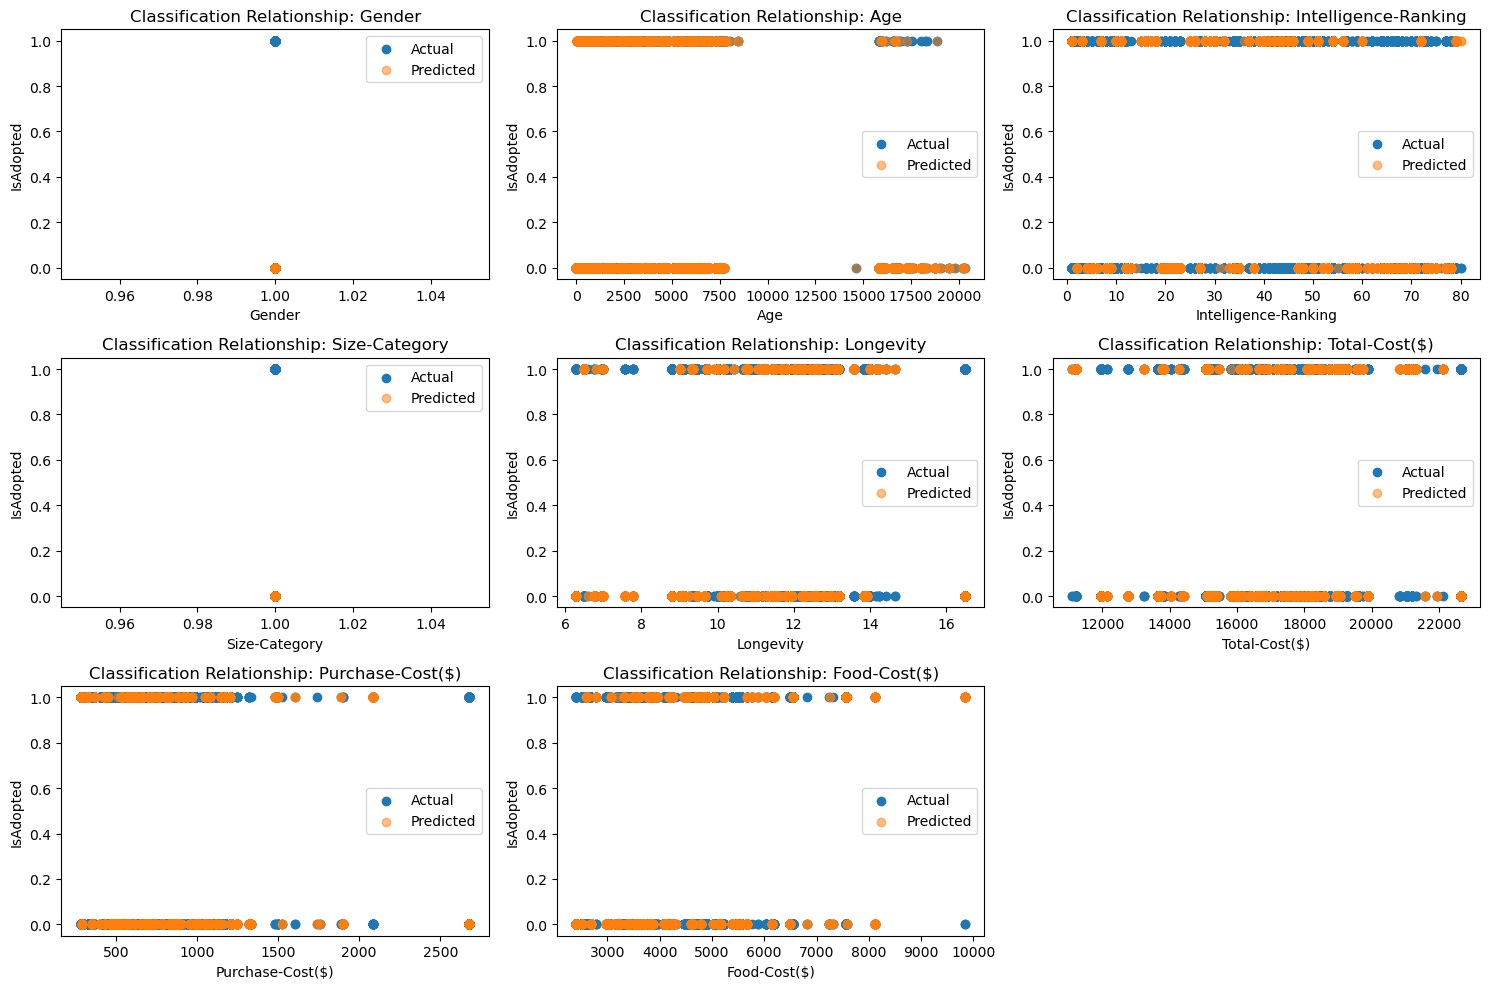

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Feature names from the dataset after one-hot encoding
feature_names = X_train_encoded.columns

# Mapping original feature names to the columns of the one-hot encoded dataset
original_features = {
    "Gender": [col for col in feature_names if 'Gender' in col],
    "Age": [col for col in feature_names if 'Age' in col],
    "Intelligence-Ranking": 'Intelligence-Ranking',
    "Size-Category": [col for col in feature_names if 'Size-Category' in col],
    "Longevity": 'Longevity',
    "Total-Cost($)": 'Total-Cost($)',
    "Purchase-Cost($)": 'Purchase-Cost($)',
    "Food-Cost($)": 'Food-Cost($)'
}

plt.figure(figsize=(15, 10))

# Iterate over each original feature
for i, (feature_name, columns) in enumerate(original_features.items(), 1):
    plt.subplot(3, 3, i)
    
    # Extract the current feature(s) columns
    if isinstance(columns, list):
        # If the original feature is one-hot encoded, sum across the columns
        x = X_train_encoded[columns].sum(axis=1).to_numpy().reshape(-1, 1)
    else:
        x = X_train_encoded[columns].to_numpy().reshape(-1, 1)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y_train_data, test_size=0.2, random_state=42)
    
    # Create Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=42)
    
    # Train the model
    dt.fit(x_train, y_train)
    
    # Visualize decision boundary
    plt.scatter(x_test, y_test, label='Actual')
    plt.scatter(x_test, dt.predict(x_test), label='Predicted', marker='o', alpha=0.5)
    
    plt.title(f"Classification Relationship: {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel('IsAdopted')
    plt.legend()

plt.tight_layout()
plt.show()


PCA visualization 

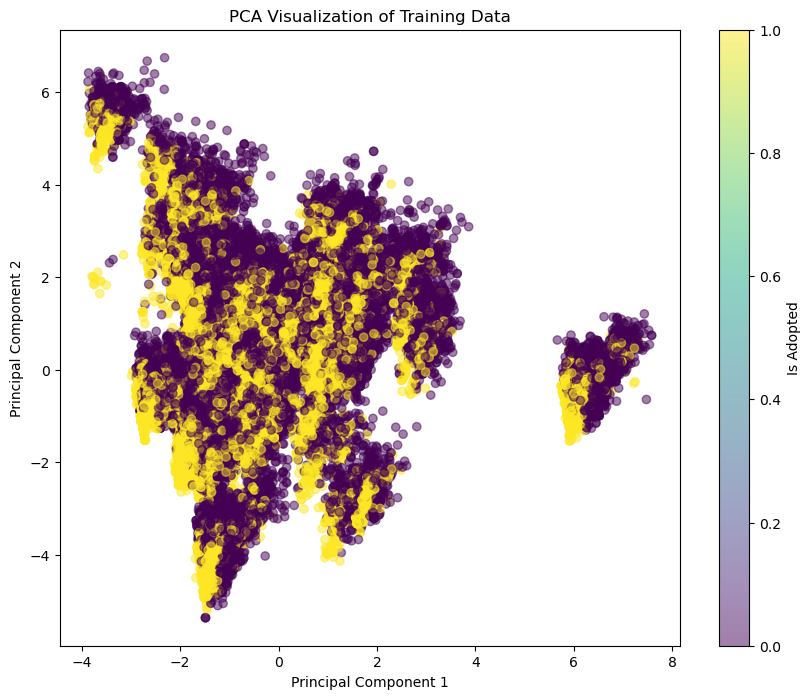

In [63]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the data points in 2D space with color-coded classes
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Is Adopted')
plt.show()

### Conclusion & Discussion

1.Feature Impact: Key factors like upkeep cost and intelligence level are important for predicting pet adoption, while age, gender, and size are less so.
2.Model Insight: The Decision Tree is more effective when using all features together, indicating that pet adoption is influenced by a combination of factors.
3.PCA Conclusion: The PCA plot suggests that adoption is a complex decision that can't be easily predicted by one or two features alone.